In [26]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import time
plt.ion()
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
import torchvision.transforms as T

In [22]:
data_transform = {
    'train': T.Compose([
        T.Resize(224),
        T.RandomCrop(224),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': T.Compose([
        T.Resize(224),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize([0.485, 0,456, 0.406],[0.229, 0.224, 0.225])
    ]),
}

In [24]:
data_dir='./data/catsfishimages'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transform[x]) for x in ['train', 'val']}

data_loader={x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16, shuffle= True, num_workers=8) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}

class_names = image_datasets['train'].classes

/home/julio/Escritorio/nuevo/env/lib/python3.9/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [38]:
example = iter(data_loader)
example_data, example_targets=example.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0],cmap='gray')
plt.show()

AttributeError: 'dict_keyiterator' object has no attribute 'next'

In [25]:
def imshow(inp, title=None, ax=None, figsize=(5,5)):
    inp=inp.numpy().transpose((1,2,0))
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.229, 0.224, 0.225])
    inp = std*inp + mean
    inp=np.clip(inp,0,1)
    if ax is None:
        fig, ax = plt.subplot(1, figsize=figsize)
    ax.imshow(inp)
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None:
        ax.set_title(title)
    

/home/julio/Escritorio/nuevo/env/lib/python3.9/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


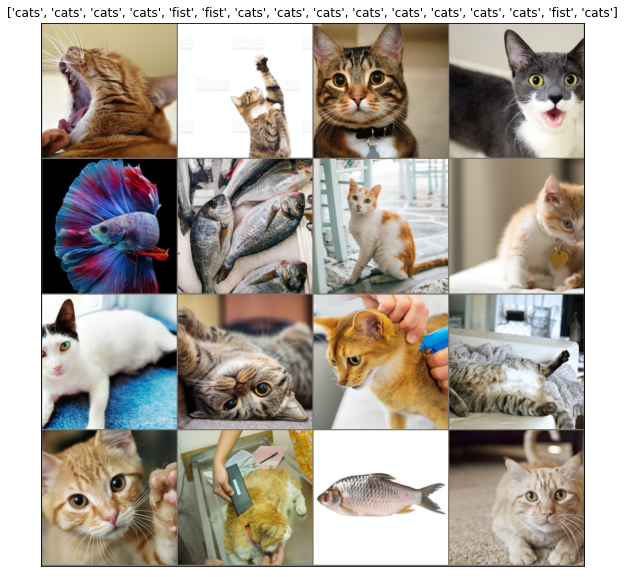

In [28]:
inputs, classes = next(iter(data_loader['train']))
out=torchvision.utils.make_grid(inputs, nrow=4)
fig, ax = plt.subplots(1, figsize=(10,10))
imshow(out,title=[class_names[x] for x in classes], ax=ax)